In [6]:
import pandas as pd


In [26]:
data = pd.read_csv(r"C:\Users\D\OneDrive\Desktop\abc\traffic accident\us data 2.csv")


In [27]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,8/2/2016 5:46,8/2/2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,8/2/2016 6:07,8/2/2016 6:37,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,8/2/2016 6:49,8/2/2016 7:19,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,8/2/2016 7:23,8/2/2016 7:53,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,8/2/2016 7:39,8/2/2016 8:09,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A-995,Source2,3,6/23/2016 10:19,6/23/2016 10:49,38.562939,-121.641922,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
995,A-996,Source2,2,6/23/2016 10:31,6/23/2016 11:01,38.022778,-121.965698,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
996,A-997,Source2,3,6/23/2016 10:22,6/23/2016 10:52,37.656654,-121.901588,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
997,A-998,Source2,2,6/23/2016 10:31,6/23/2016 11:46,38.690273,-121.392136,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day


In [28]:
#Checking the dimension of the training dataset:
print("The total rows in the dataset is:" ,data.shape[0] ,"\nThe total columns in the dataset is:" ,data.shape[1])

The total rows in the dataset is: 999 
The total columns in the dataset is: 46


In [29]:
#Converting into date time format:
data['Start_Time'] = pd.to_datetime(data["Start_Time"], errors="coerce")
data['End_Time'] = pd.to_datetime(data["End_Time"], errors="coerce")
data["Year"]=data["Start_Time"].dt.year
data["Severity"]=data["Severity"].apply(lambda x : str(x))
data["Hour"]=data["Start_Time"].dt.hour
data["Month"]=data["Start_Time"].dt.month
data["Day"]=data["Start_Time"].dt.day_name()
data['Time_of_Year'] = data['Start_Time'].dt.quarter
data['Duration'] = data['End_Time'] - data['Start_Time']
data['Duration_in_minutes'] = data['Duration'].dt.total_seconds() / 60

In [30]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Hour,Month,Day,Time_of_Year,Duration,Duration_in_minutes
0,A-1,Source2,3,2016-08-02 05:46:00,2016-08-02 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016,5,8,Tuesday,3,0 days 05:14:00,314.0
1,A-2,Source2,2,2016-08-02 06:07:00,2016-08-02 06:37:00,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016,6,8,Tuesday,3,0 days 00:30:00,30.0
2,A-3,Source2,2,2016-08-02 06:49:00,2016-08-02 07:19:00,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016,6,8,Tuesday,3,0 days 00:30:00,30.0
3,A-4,Source2,3,2016-08-02 07:23:00,2016-08-02 07:53:00,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016,7,8,Tuesday,3,0 days 00:30:00,30.0
4,A-5,Source2,2,2016-08-02 07:39:00,2016-08-02 08:09:00,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016,7,8,Tuesday,3,0 days 00:30:00,30.0


In [81]:
# Checking the type of data in each column:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   ID                     999 non-null    object         
 1   Source                 999 non-null    object         
 2   Severity               999 non-null    object         
 3   Start_Time             999 non-null    datetime64[ns] 
 4   End_Time               999 non-null    datetime64[ns] 
 5   Start_Lat              999 non-null    float64        
 6   Start_Lng              999 non-null    float64        
 7   Distance(mi)           999 non-null    float64        
 8   Description            999 non-null    object         
 9   Street                 998 non-null    object         
 10  City                   999 non-null    object         
 11  County                 999 non-null    object         
 12  State                  999 non-null    object     

In [82]:
# Calculating the number of categorical and numeric column:
data.dtypes.value_counts()

object             20
bool               14
float64             9
int32               5
datetime64[ns]      2
timedelta64[ns]     1
Name: count, dtype: int64

In [83]:
#checking for missing values
data.isna().sum().sort_values(ascending = False)

Wind_Speed(mph)          47
Visibility(mi)            3
Weather_Condition         2
Airport_Code              1
Wind_Direction            1
Street                    1
Pressure(in)              1
Humidity(%)               1
Temperature(F)            1
Weather_Timestamp         1
ID                        0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Railway                   0
Sunrise_Sunset            0
Civil_Twilight            0
Nautical_Twilight         0
Astronomical_Twilight     0
Year                      0
Hour                      0
Month                     0
Day                       0
Time_of_Year              0
Duration                  0
Duration_in_minutes       0
Is_Weekend                0
Roundabout                0
Amenity                   0
No_Exit                   0
Junction                  0
Severity                  0
Start_Time                0
End_Time            

In [84]:
#Descriptive Analysis
data.describe()

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Year,Hour,Month,Time_of_Year,Duration,Duration_in_minutes,Hour_of_Day
count,999,999,999.000000,999.000000,999.000000,998.000000,998.000000,998.000000,996.000000,952.000000,999.0,999.000000,999.000000,999.000000,999,999.00000,999.000000
mean,2016-05-19 17:45:53.993993984,2016-05-19 12:14:52.792792832,39.422110,-93.926503,0.034384,48.905912,66.703407,29.976864,7.975402,9.848109,2016.0,10.670671,5.138138,1.929930,-1 days +18:28:58.798798799,-331.02002,10.670671
min,2016-01-03 05:05:00,2016-01-03 05:35:00,36.609657,-123.354477,0.000000,3.900000,10.000000,28.620000,0.200000,1.200000,2016.0,0.000000,1.000000,1.000000,-294 days +01:12:00,-423288.00000,0.000000
25%,2016-02-24 05:20:30,2016-02-24 02:51:30,38.731091,-121.225956,0.000000,32.000000,49.000000,29.870000,6.000000,5.800000,2016.0,7.000000,2.000000,1.000000,0 days 00:30:00,30.00000,7.000000
50%,2016-06-21 11:50:00,2016-06-21 12:10:00,39.759201,-84.184135,0.010000,46.900000,70.000000,30.010000,10.000000,9.200000,2016.0,10.000000,6.000000,2.000000,0 days 00:30:00,30.00000,10.000000
75%,2016-07-03 08:14:30,2016-07-03 07:41:00,39.953142,-83.032806,0.010000,64.000000,89.000000,30.090000,10.000000,12.700000,2016.0,14.000000,7.000000,3.000000,0 days 00:45:00,45.00000,14.000000
max,2016-12-03 11:55:00,2016-12-03 23:59:00,41.428753,-81.550728,7.070000,99.000000,100.000000,30.620000,30.000000,31.100000,2016.0,23.000000,12.000000,4.000000,30 days 04:00:00,43440.00000,23.000000
std,NaN,NaN,1.015840,17.058791,0.287535,21.350183,24.627541,0.239148,3.322481,4.808265,0.0,4.591603,3.056079,1.033068,9 days 08:25:31.935003038,13465.53225,4.591603


In [85]:
# The percentage share of missing values for each column in the entire data
missing_percentage = data.isna().sum().sort_values(ascending = False)/len(data)
missing_percentage
#sort out the ones with zeroes
missing_percentage[missing_percentage != 0]

Wind_Speed(mph)      0.047047
Visibility(mi)       0.003003
Weather_Condition    0.002002
Airport_Code         0.001001
Wind_Direction       0.001001
Street               0.001001
Pressure(in)         0.001001
Humidity(%)          0.001001
Temperature(F)       0.001001
Weather_Timestamp    0.001001
dtype: float64

In [86]:
# Percentage of missing value
missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 Wind_Speed(mph)      4.704705
Visibility(mi)       0.300300
Weather_Condition    0.200200
Airport_Code         0.100100
Wind_Direction       0.100100
Street               0.100100
Pressure(in)         0.100100
Humidity(%)          0.100100
Temperature(F)       0.100100
Weather_Timestamp    0.100100
dtype: float64


In [88]:
# List of Columns Having Null Values
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['Street', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

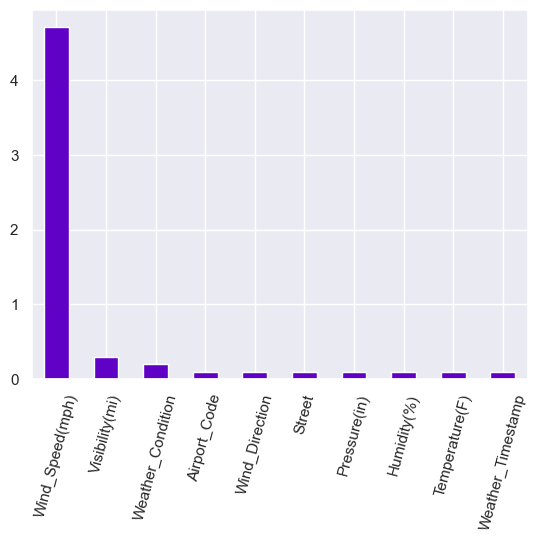

In [90]:
missing_percentage[missing_percentage != 0].plot(kind = "bar");
plt.xticks(rotation=75);
plt.show()

In [91]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Hour', 'Month', 'Day', 'Time_of_Year', 'Duration',
       'Duration_in_minutes', 'Is_Weekend', 'Hour_of_Day'],
      dtype='object')

In [92]:
# Plotting the 'subscribed' frequency
sns.countplot(data=data, x='Severity')

<Axes: xlabel='Severity', ylabel='count'>

In [93]:
crosstab=pd.crosstab(data["Timezone"],data["Severity"])
crosstab

Severity,1,2,3,4
Timezone,,,,
US/Eastern,2,490,235,1
US/Pacific,1,133,137,0


In [94]:
cities = data.City.unique()
len(cities)


184

In [95]:
#Showing no. of accidents in dfferent cities

cities_by_accidents = data.City.value_counts().sort_values(ascending = False)
cities_by_accidents

City
Dayton            321
Columbus          170
Sacramento         32
San Jose           21
Miamisburg         16
                 ... 
San Pablo           1
Soquel              1
Monterey            1
Seaside             1
Citrus Heights      1
Name: count, Length: 184, dtype: int64

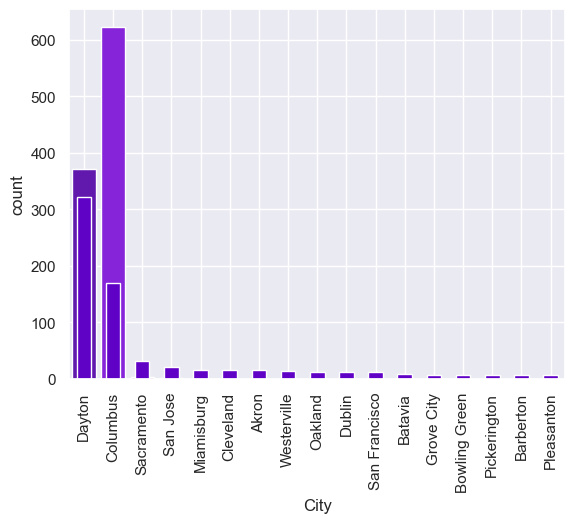

In [96]:
# Showing Top 17 cities with highest no. of accidents

cities_by_accidents[:17].plot(kind = 'bar');
plt.xticks(rotation=90)
plt.show()

In [97]:
high_accident_cities = cities_by_accidents[cities_by_accidents >=1000];
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000];
print("No. of cities with high accidents are {}".format(len(high_accident_cities)))
print("Percentage of cities with high accidents are {}".format((len(high_accident_cities)/len(cities))*100))
print("No. of cities with low accidents are {}".format(len(low_accident_cities)))
print("Percentage of cities with low accidents are {}".format((len(low_accident_cities)/len(cities))*100))

No. of cities with high accidents are 0
Percentage of cities with high accidents are 0.0
No. of cities with low accidents are 184
Percentage of cities with low accidents are 100.0


In [98]:
import numpy as np

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

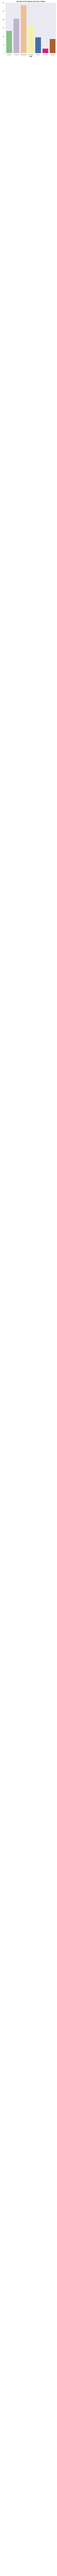

In [100]:


custom_palette = sns.color_palette("Accent", 7)

# Change the default color palette to the custom palette
sns.set_palette(custom_palette)

plt.figure(figsize=(8, 8))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=data["Day"], order=order)

# Calculate the total counts
total_counts = data["Day"].value_counts()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")

ax = plt.gca()

for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]]/total_counts.sum()) * 100
    ax.text(
        bar.get_x(),
        bar.get_height()-15000,
        f'{proportion:.2f}%',
        fontsize=15,
        weight='bold',
        color='white'
    )

plt.show()

In [101]:
data["Is_Weekend"] = data["Day"].isin(["Saturday", "Sunday"])

In [102]:
sns.reset_defaults()

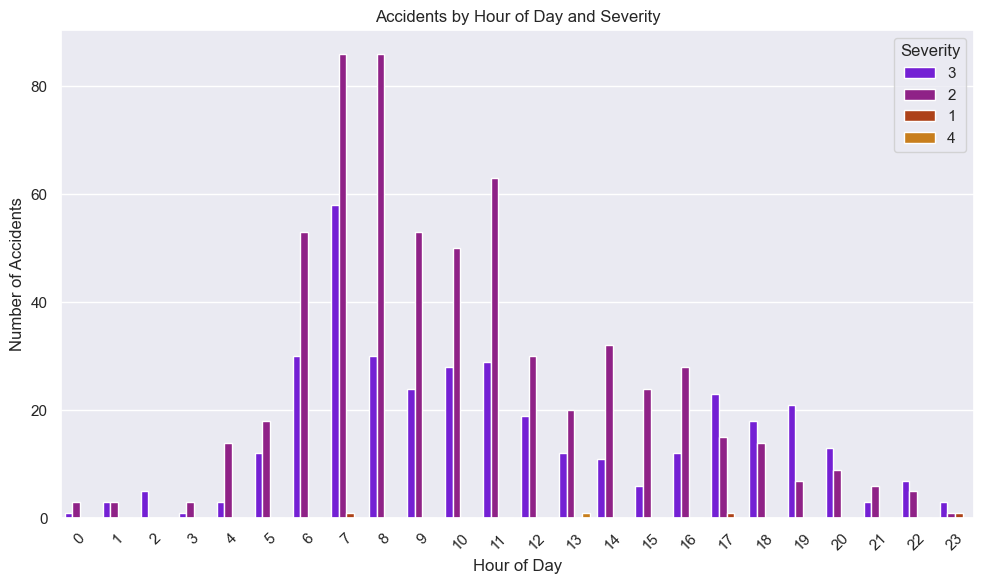

In [103]:
# Set chart style
palette=sns.color_palette('gnuplot')
sns.set(style="darkgrid", palette="gnuplot", context="notebook",)

# Extract hour of day from 'Start_Time'
data['Hour_of_Day'] = data['Start_Time'].dt.hour

# Create a new dataset with 'Severity' and 'Hour_of_Day' columns
severity_hour_dataset = data[['Severity', 'Hour_of_Day']].copy()

# Task 3: Create a Seaborn countplot to visualize accidents by hour and severity
plt.figure(figsize=(10, 6))
sns.countplot(data=severity_hour_dataset, x='Hour_of_Day', hue='Severity', palette='gnuplot')
plt.title('Accidents by Hour of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

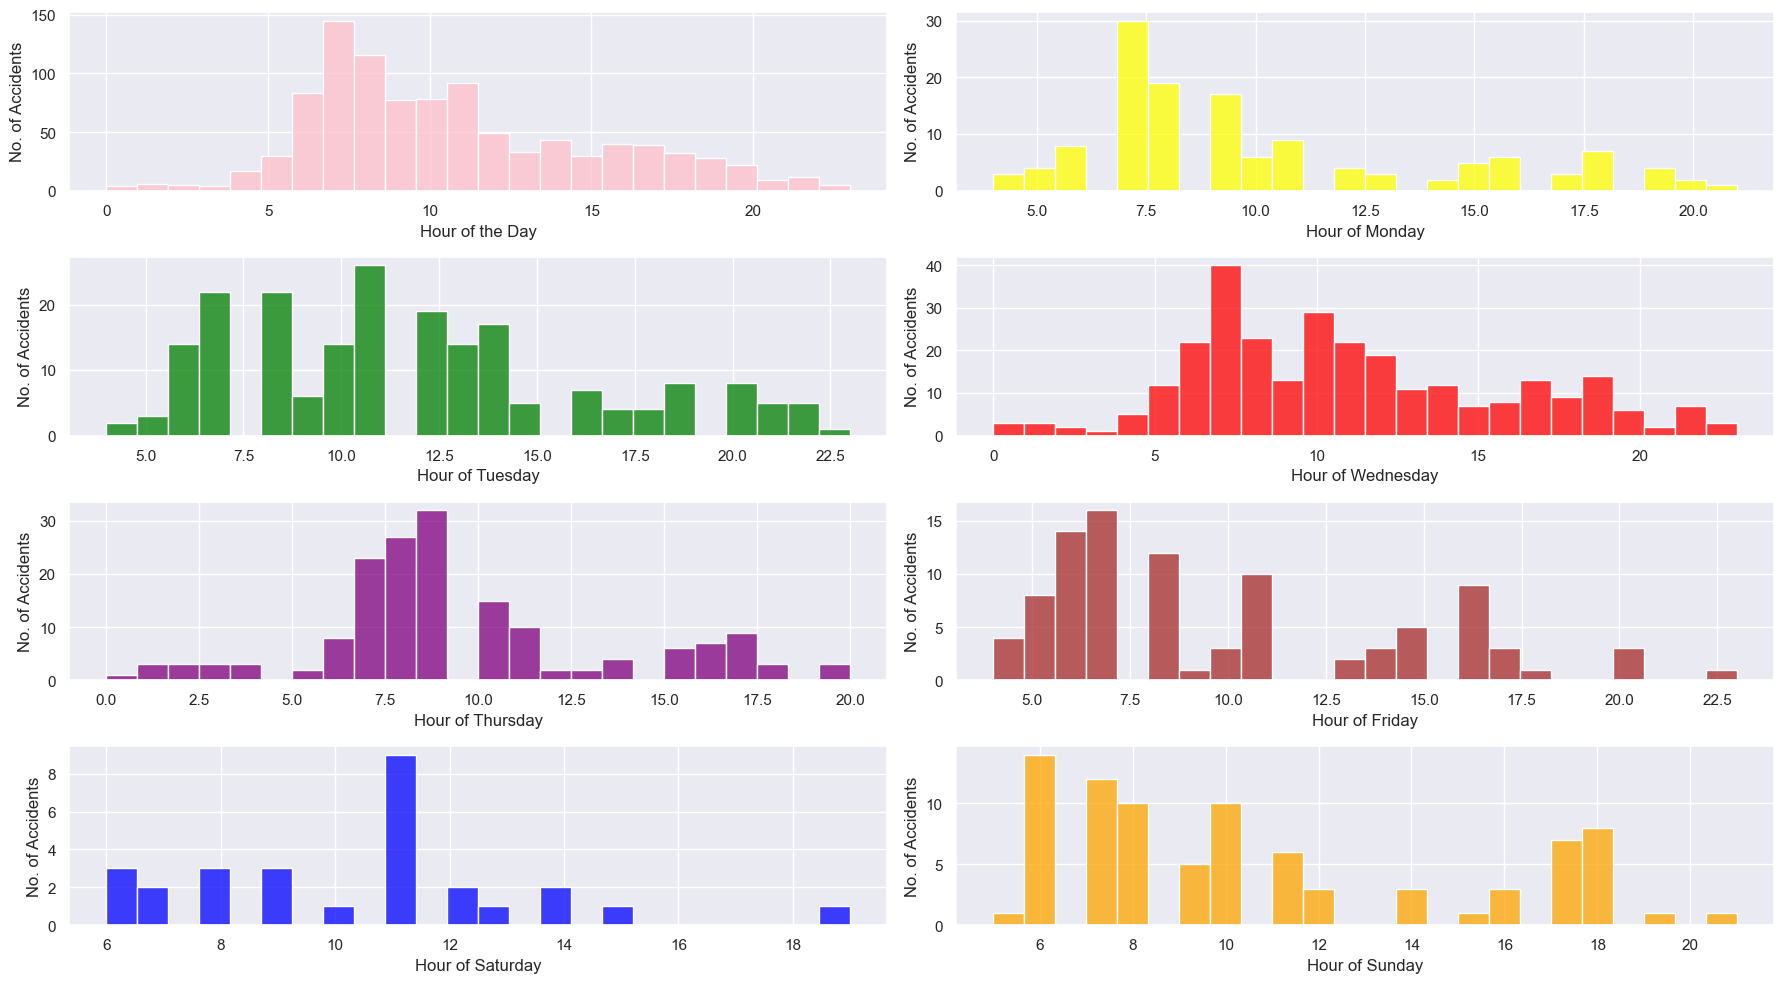

In [104]:
# Viewing the distribution of  hourly Accidents for each day of week separately.

fig,axes = plt.subplots(4, 2, figsize=(18, 10))

#For all days (Overall) Hourly accident distribution
sns.histplot(data.Start_Time.dt.hour, bins=24, ax=axes[0,0], color = "Pink");
axes[0,0].set_xlabel("Hour of the Day")
axes[0,0].set_ylabel("No. of Accidents")

#For Monday Hourly accident distribution

For_Monday = data.Start_Time[data.Start_Time.dt.dayofweek == 0]
Monday_distribution = sns.histplot(For_Monday.dt.hour, bins = 24, ax = axes[0,1], color = "Yellow")
axes[0,1].set_xlabel("Hour of Monday")
axes[0,1].set_ylabel("No. of Accidents")


#For Tuesday Hourly accident distribution

For_Tuesday = data.Start_Time[data.Start_Time.dt.dayofweek == 1]
Tuesday_distribution = sns.histplot(For_Tuesday.dt.hour, bins = 24, ax = axes[1,0],  color = "green")
axes[1,0].set_xlabel("Hour of Tuesday")
axes[1,0].set_ylabel("No. of Accidents")

#For Wednesday Hourly accident distribution

For_Wednesday = data.Start_Time[data.Start_Time.dt.dayofweek == 2]
Wednesday_distribution = sns.histplot(For_Wednesday.dt.hour, bins = 24, ax = axes[1,1],  color = "Red")
axes[1,1].set_xlabel("Hour of Wednesday")
axes[1,1].set_ylabel("No. of Accidents")

#For Thursday Hourly accident distribution

For_Thursday = data.Start_Time[data.Start_Time.dt.dayofweek == 3]
Thursday_distribution = sns.histplot(For_Thursday.dt.hour, bins = 24, ax = axes[2,0],  color = "Purple")
axes[2,0].set_xlabel("Hour of Thursday")
axes[2,0].set_ylabel("No. of Accidents")

#For Friday Hourly accident distribution

For_Friday = data.Start_Time[data.Start_Time.dt.dayofweek == 4]
Friday_distribution = sns.histplot(For_Friday.dt.hour, bins = 24, ax = axes[2,1],  color = "Brown")
axes[2,1].set_xlabel("Hour of Friday")
axes[2,1].set_ylabel("No. of Accidents")

#For Saturday Hourly accident distribution

For_saturday = data.Start_Time[data.Start_Time.dt.dayofweek == 5]
Saturday_distribution = sns.histplot(For_saturday.dt.hour, bins = 24, ax = axes[3,0],  color = "Blue")
axes[3,0].set_xlabel("Hour of Saturday")
axes[3,0].set_ylabel("No. of Accidents")

#For Sunday Hourly accident distribution

For_Sunday = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
Sunday_distribution = sns.histplot(For_Sunday.dt.hour, bins = 24, ax = axes[3,1], color = "Orange")
axes[3,1].set_xlabel("Hour of Sunday")
axes[3,1].set_ylabel("No. of Accidents")


plt.tight_layout()
plt.show()

In [105]:
data["Weather_Condition"].value_counts()

Weather_Condition
Clear                     340
Overcast                  224
Light Snow                104
Mostly Cloudy              94
Partly Cloudy              60
Scattered Clouds           59
Light Rain                 44
Rain                       28
Haze                       21
Light Freezing Drizzle     10
Heavy Rain                  3
Fog                         2
Snow                        2
Shallow Fog                 1
Light Drizzle               1
Light Freezing Rain         1
Cloudy                      1
Drizzle                     1
Light Rain Showers          1
Name: count, dtype: int64

In [106]:
#Selecting only top 15 weather conditions which accounted for maximum accidents
weather = data['Weather_Condition'].value_counts().sort_values(ascending = False).head(15)
weather

Weather_Condition
Clear                     340
Overcast                  224
Light Snow                104
Mostly Cloudy              94
Partly Cloudy              60
Scattered Clouds           59
Light Rain                 44
Rain                       28
Haze                       21
Light Freezing Drizzle     10
Heavy Rain                  3
Fog                         2
Snow                        2
Shallow Fog                 1
Light Drizzle               1
Name: count, dtype: int64

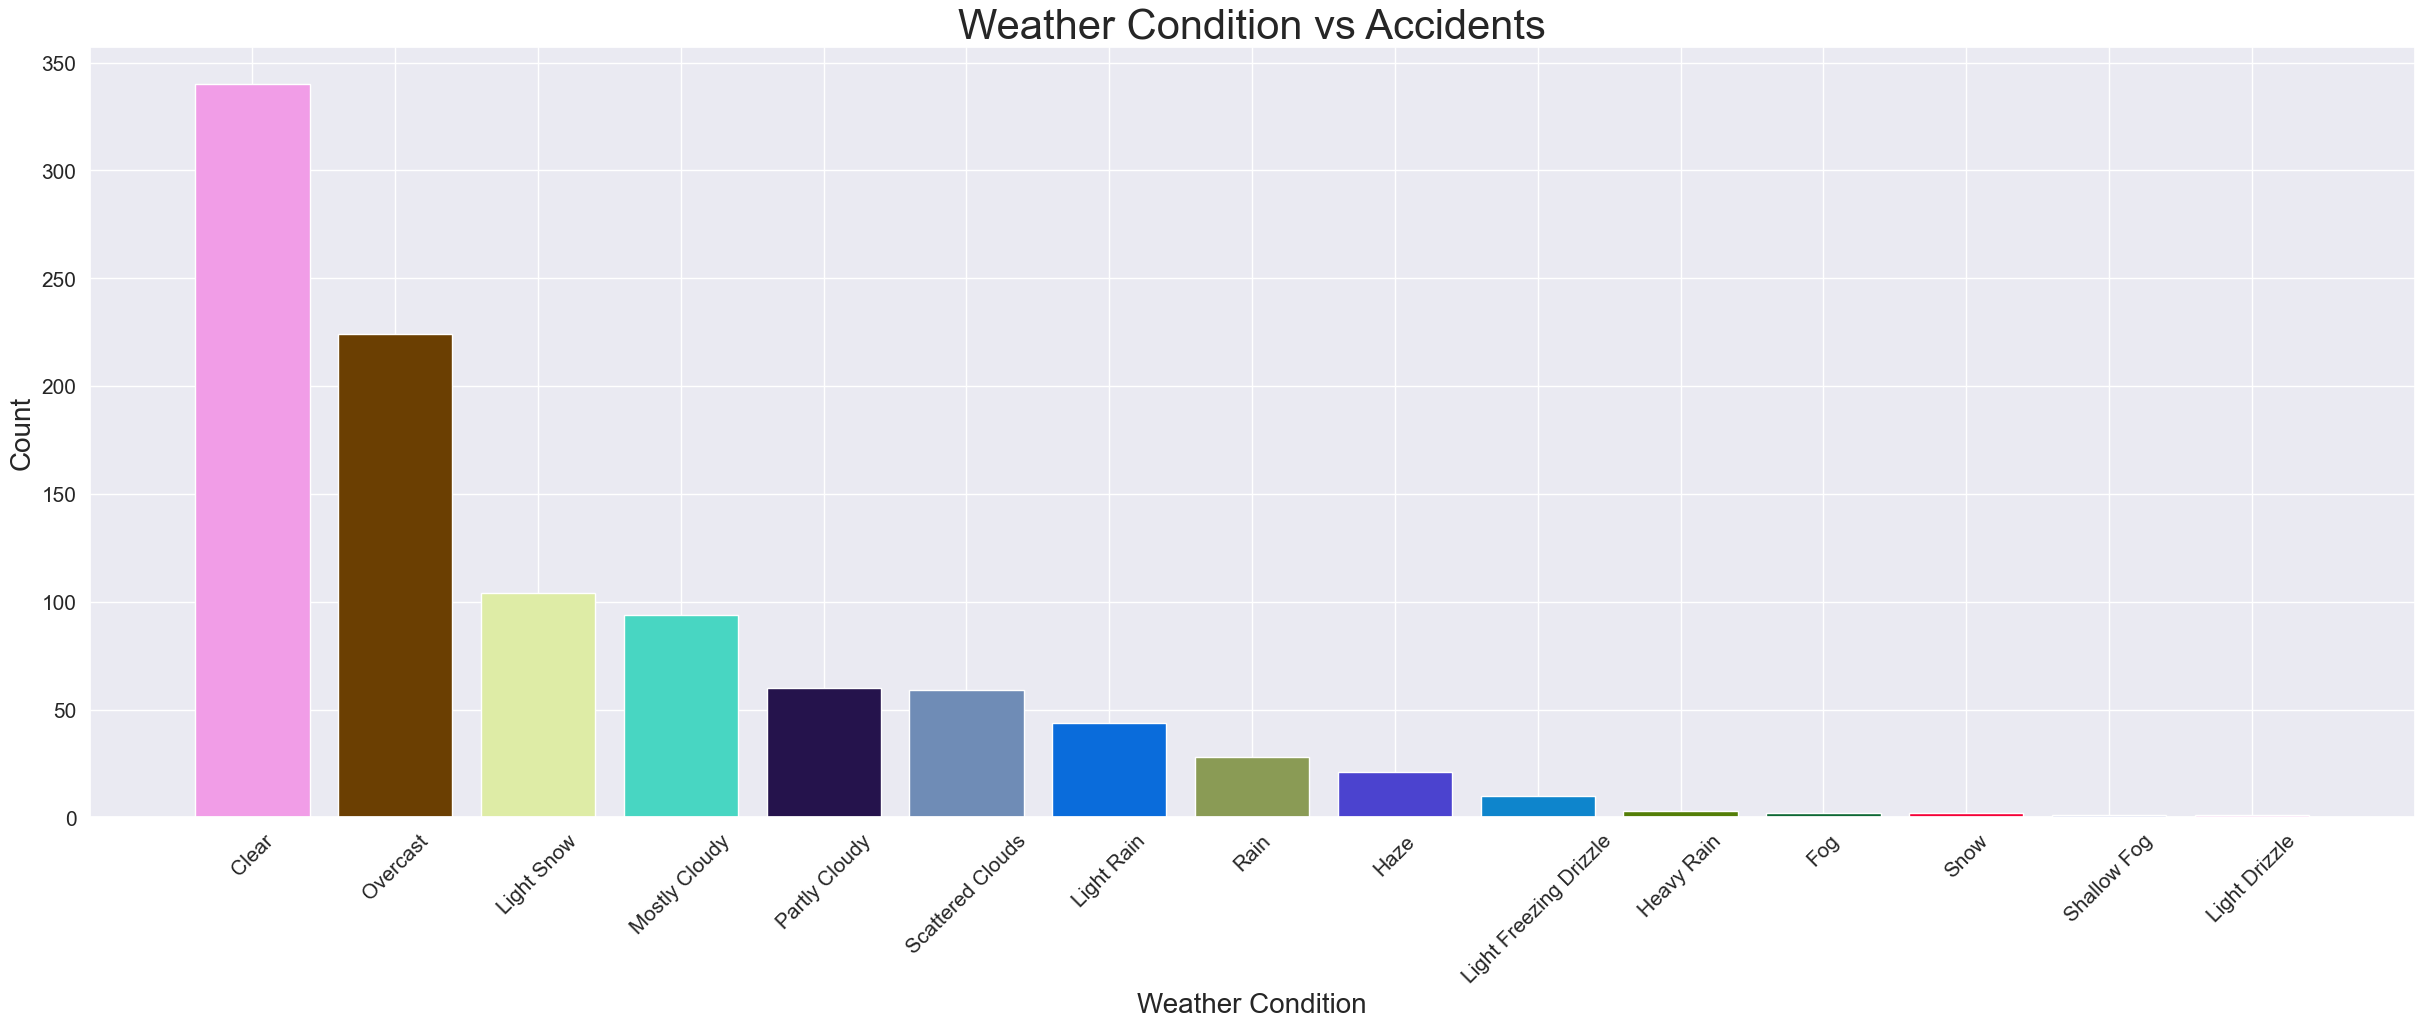

In [107]:
import random
figsize = (30, 10)

Accident_Counts = weather.values
Weather_Conditions = weather.index
def generate_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

bar_colors = [generate_random_color() for _ in range(len(Weather_Conditions))]

plt.figure(figsize=figsize)

plt.bar(Weather_Conditions, Accident_Counts, color=bar_colors)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Weather Condition vs Accidents", fontsize = 30)

plt.show()

In [110]:
# Create a new dataset with boolean columns and severity
bool_severity_dataset = data[['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                              'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                              'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

# Calculate the number of accidents for each combination of severity and boolean columns
accidents_by_bool_severity = bool_severity_dataset.groupby(['Severity']).sum()

# Create a heatmap to visualize the relationship between accident severity and boolean columns
plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_by_bool_severity/1000, cmap='gnuplot', annot=True, fmt='.1f')
plt.title('Accidents (Thousands) per Road Features')
plt.xlabel('Road Features')
plt.ylabel('Severity')
plt.tight_layout()

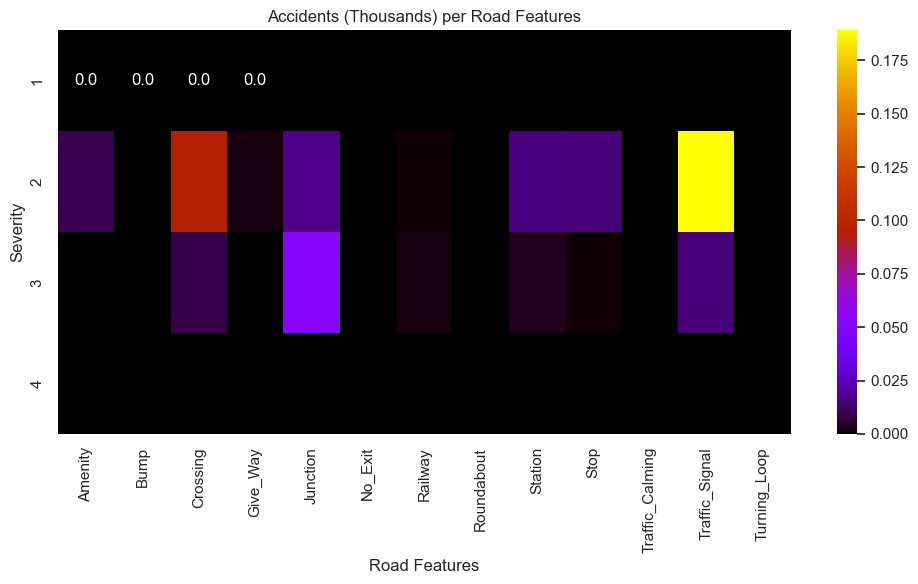

In [111]:
plt.show()

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

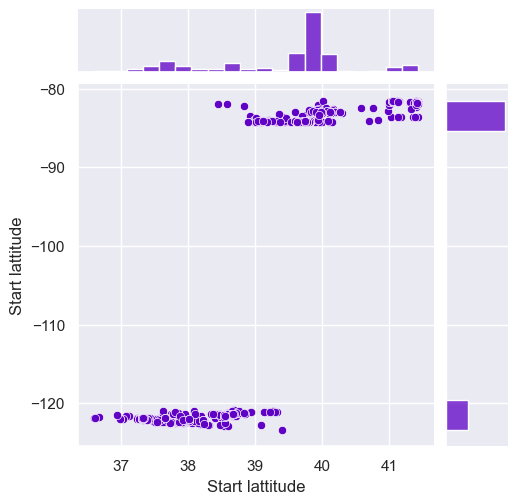

In [141]:
#. Longitude and Latitude with Accidents Density
data_num=data.select_dtypes(np.number)
sns.jointplot(x=data_num.Start_Lat.values , y=data_num.Start_Lng.values,height=5)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()